### Retail trade analytics (using python visualization libs)

#### Preparation for analysis

1. Import libs, load a function that outputs short dataset information and renames columns


In [1]:
import pandas as pd
import seaborn as sns
import datetime

In [2]:
def first_check(file_path):
    
    df = pd.read_excel(file_path)
    #df = pd.read_csv(file_path)
    #df = pd.read_csv(file_path, compression='zip')
    df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
 
    print()
    print('First 3 rows of the table')
    display(df.head(3))
 
    print()
    print('Data types')
    display(df.dtypes)
 
    print()
    print('Dataframe info')   
    print(df.info())
 
    print()
    print('Characteristics of the numbers in the dataframe')  
    display(df.describe())
 
    print()
    print('Column names')  
    print(df.columns)
    
    return df
df = first_check('data-2.xlsx')


First 3 rows of the table


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714



Data types


row_id                     int64
order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_id               object
customer_name             object
segment                   object
country_region            object
city                      object
state                     object
postal_code              float64
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
dtype: object


Dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          9994 non-null   int64         
 1   order_id        9994 non-null   object        
 2   order_date      9994 non-null   datetime64[ns]
 3   ship_date       9994 non-null   datetime64[ns]
 4   ship_mode       9994 non-null   object        
 5   customer_id     9994 non-null   object        
 6   customer_name   9994 non-null   object        
 7   segment         9994 non-null   object        
 8   country_region  9994 non-null   object        
 9   city            9994 non-null   object        
 10  state           9994 non-null   object        
 11  postal_code     9983 non-null   float64       
 12  region          9994 non-null   object        
 13  product_id      9994 non-null   object        
 14  category        9994 non-null   object  

,row_id,order_date,ship_date,postal_code,sales,quantity,discount,profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2018-04-30 10:03:51.979187712,2018-05-04 09:03:29.645787392,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2016-01-03 00:00:00,2016-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2017-05-23 00:00:00,2017-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2018-06-26 00:00:00,2018-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2019-05-14 00:00:00,2019-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2019-12-30 00:00:00,2020-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108



Column names
Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country_region', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')


2. Create additional columns with price and profit per unit of production


In [51]:
df['price'] = df['sales']/df['quantity']
df['profit_per_unit'] = df['profit']/df['quantity']
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,price,profit_per_unit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,20.9568
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,73.1940
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,3.4357
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-76.6062
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,1.2582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160,1.3676
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800,7.8166
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880,9.6966
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000,3.3300


#### Charts:

1. Create a quantity distribution graph

In [52]:
df['quantity'].value_counts()

quantity
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64

<Axes: >

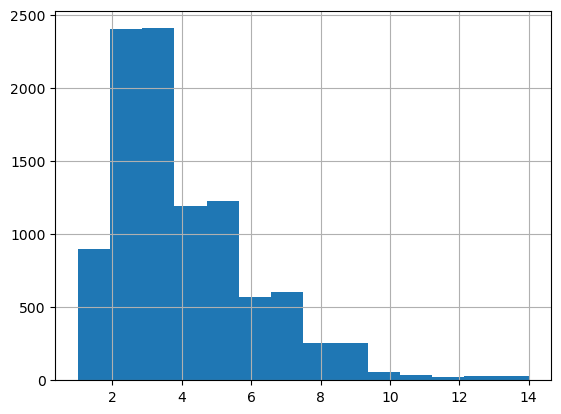

In [53]:
df['quantity'].hist(bins = 14)

<Axes: xlabel='quantity', ylabel='Count'>

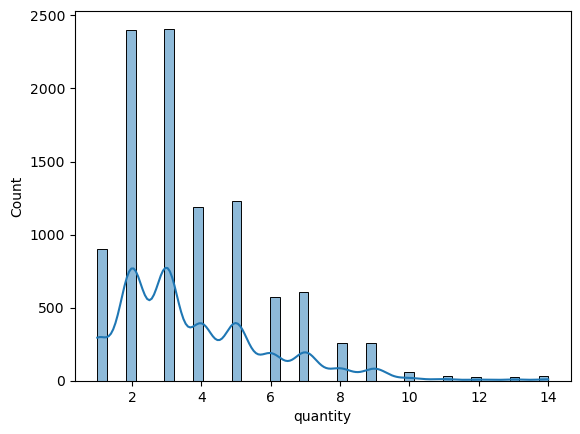

In [54]:
sns.histplot(df.quantity, kde=True)

2. Create barchart: value of total sales by region

In [77]:
sum_sales = df.groupby('region').agg({'sales':'sum'}).sort_values('sales', ascending = False)
sum_sales

,sales
region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


<Axes: xlabel='region'>

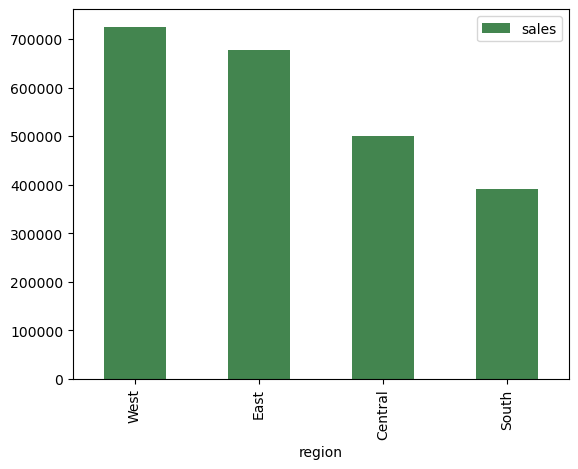

In [80]:
sum_sales.plot.bar(color=(67/255,133/255,79/255))

3. Create barchart: value of total profit by sub_category


In [177]:
sum_profit = df.groupby('sub_category').agg({'profit':'sum'}).sort_values('profit', ascending = False)
sum_profit

,profit
sub_category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


<Axes: xlabel='sub_category'>

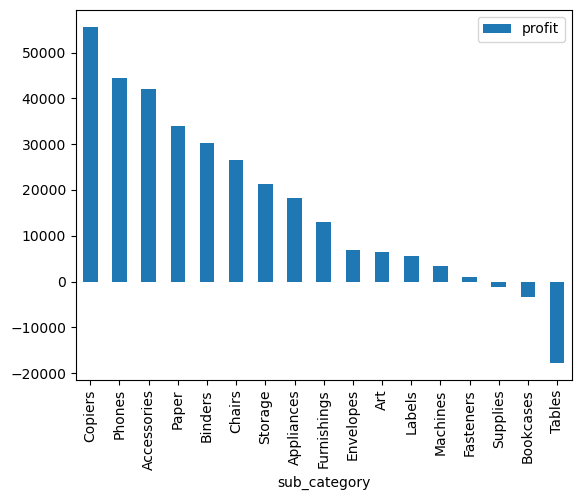

In [178]:
sum_profit.plot.bar()

4. Create a dataset containing information on chairs. Create a boxplot by region showing the price distributions for each region (contains a short conclusion)

In [59]:
df_chairs = df.query('sub_category == "Chairs"')
df_chairs

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,price,profit_per_unit
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,243.980,73.1940
23,24,US-2019-156909,2019-07-16,2019-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,35.686,-0.5098
39,40,CA-2017-117415,2017-12-27,2017-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.058,3,0.3,-15.1470,70.686,-5.0490
52,53,CA-2017-115742,2017-04-18,2017-04-22,Standard Class,DP-13000,Darren Powers,Consumer,United States,New Albany,...,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",89.990,1,0.0,17.0981,89.990,17.0981
57,58,CA-2018-111682,2018-06-17,2018-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.410,5,0.1,7.0980,63.882,1.4196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,9894,US-2018-115441,2018-07-25,2018-07-28,Second Class,SH-19975,Sally Hughsby,Corporate,United States,Milwaukee,...,FUR-CH-10004626,Furniture,Chairs,Office Star Flex Back Scooter Chair with Alumi...,403.560,4,0.0,96.8544,100.890,24.2136
9907,9908,US-2017-129007,2017-09-13,2017-09-15,First Class,KD-16615,Ken Dana,Corporate,United States,Anaheim,...,FUR-CH-10000155,Furniture,Chairs,Global Comet Stacking Armless Chair,717.720,3,0.2,71.7720,239.240,23.9240
9912,9913,CA-2017-132388,2017-10-10,2017-10-12,First Class,KN-16390,Katherine Nockton,Corporate,United States,Santa Barbara,...,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",362.136,3,0.2,-54.3204,120.712,-18.1068
9919,9920,CA-2018-149272,2018-03-15,2018-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,528.430,5,0.3,-143.4310,105.686,-28.6862


<Axes: xlabel='region', ylabel='price'>

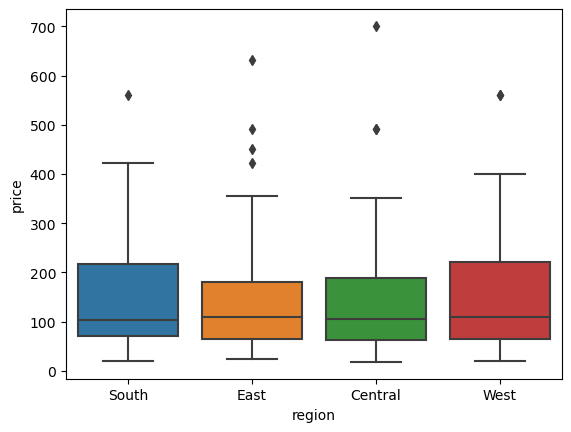

In [60]:
sns.boxplot(data=df_chairs, x='region', y='price')

Conclusion: 
Minimum prices for chairs are virtually the same for all regions. Approximately half of all chairs for each region are sold in the under $100 price range (based on median values). The most expensive items can be purchased in the Eastern and Central regions. The Eastern region is also characterized by a higher number of outliers (relative to the maximum value) compared to the other regions.

5. Create a graph of sales dynamics (line chart) 

Task: make a sales schedule by month of 2018

a) Create a dataframe containing data for 2018

In [70]:
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year
df_2018 = df.query('year == 2018')
df_2018

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,sub_category,product_name,sales,quantity,discount,profit,price,profit_per_unit,month,year
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,130.980,20.9568,11,2018
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,243.980,73.1940,11,2018
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,7.310,3.4357,6,2018
13,14,CA-2018-161389,2018-12-05,2018-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,135.992,44.1974,12,2018
21,22,CA-2018-137330,2018-12-09,2018-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,Art,Newell 318,19.460,7,0.0,5.0596,2.780,0.7228,12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,9979,US-2018-103674,2018-12-06,2018-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816,3.344,1.1704,12,2018
9979,9980,US-2018-103674,2018-12-06,2018-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152,31.248,10.9368,12,2018
9982,9983,US-2018-157728,2018-09-22,2018-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132,5.080,2.3876,9,2018
9983,9984,US-2018-157728,2018-09-22,2018-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344,48.990,13.7172,9,2018


b) Create sales dataframe by month in 2018

In [72]:
sales_2018_by_month = df_2018.groupby('month', as_index = False).agg({'sales':'sum'})
sales_2018_by_month

,month,sales
0,1,18542.4910
1,2,22978.8150
2,3,51715.8750
3,4,38750.0390
4,5,56987.7280
5,6,40344.5340
6,7,39261.9630
7,8,31115.3743
8,9,73410.0249
9,10,59687.7450


c) The sales chart by month in 2018 looks like this:

<Axes: xlabel='month', ylabel='sales'>

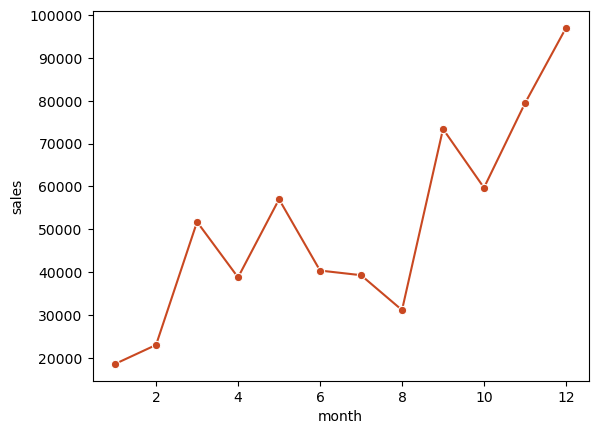

In [84]:
sns.lineplot(data=sales_2018_by_month, x='month', y='sales',color=(201/255,72/255,33/255), marker='o')

6. Create scatter plot of Sales and Profit dependence (contains a short conclusion)

<Axes: xlabel='sales', ylabel='profit'>

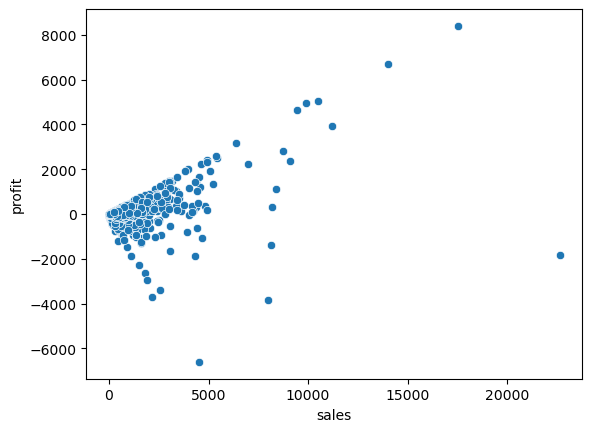

In [86]:
sns.scatterplot(data=df, x="sales", y="profit")

Conclusion: the majority of all sales are in the range from 0 to 5000. The predominant part of sales in this range bring profit from 0 to 2000, but it is worth noting that quite a significant part of sales in the same range also brings a loss in the range from 0 to 2000, the loss of a very small part of the same range can reach 4000 (in one case the loss was more than 6000). Sales in the range of 5000 or more predominantly make a profit in the range of 2000 to 6000. The maximum profit per order was over 8000. The maximum sales per order amounted to over 20000 and brought a loss of just over 1500.

7. Create pie chart: share of sales and profit share by Category

In [105]:
sales_by_category = df.groupby('category').agg({'sales':'sum'})
sales_by_category

,sales
category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [106]:
profit_by_category = df.groupby('category').agg({'profit':'sum'})
profit_by_category

,profit
category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


<Axes: title={'center': 'Bar Chart: sales by category'}, ylabel='sales'>

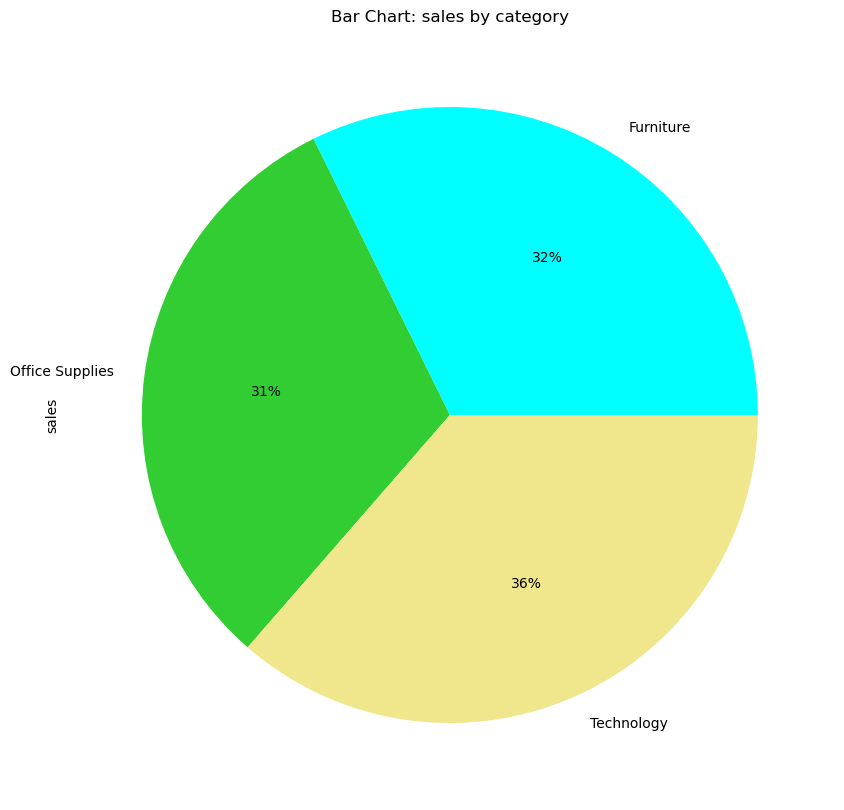

In [176]:
sales_by_category['sales'].plot(kind='pie', title="Bar Chart: sales by category", ylabel='sales', figsize=(11, 10), autopct='%1.0f%%', colors = ['cyan', 'limegreen', 'khaki'])

<Axes: title={'center': 'Bar Chart: profit by category'}, ylabel='profit'>

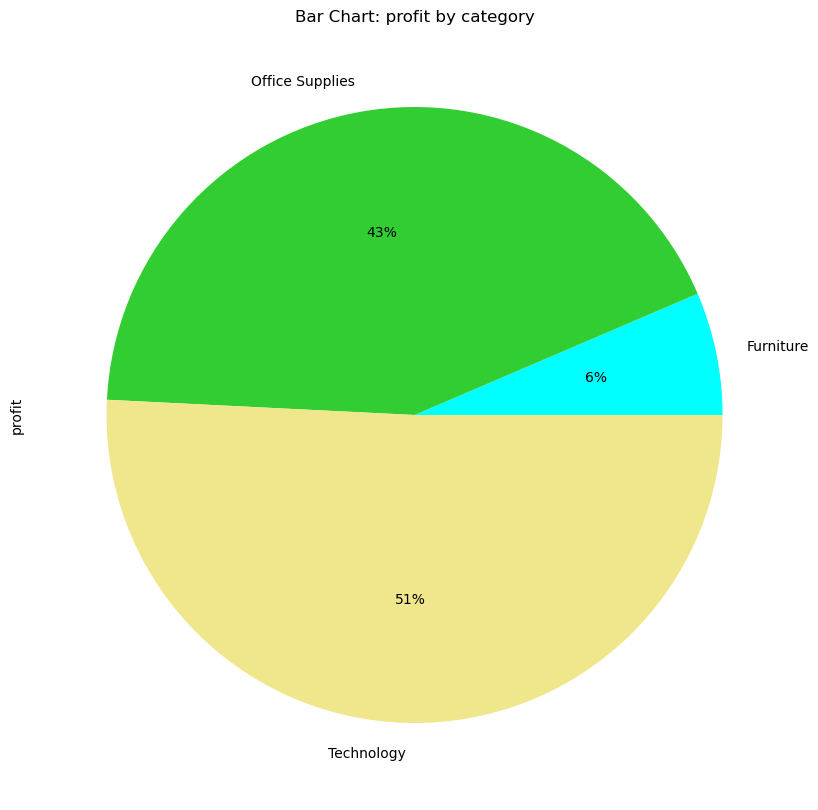

In [175]:
profit_by_category['profit'].plot(kind='pie', title="Bar Chart: profit by category", ylabel='profit', figsize=(11, 10), autopct='%1.0f%%', colors = ['cyan', 'limegreen', 'khaki'])